# Question 1

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.

In [27]:
#Import library and csv file
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Copy of 2019 Winter Data Science Intern Challenge Data Set - Sheet1-2.csv")
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


## Part A : Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 


**Answer**: The incorrect AOV of \$3145.13 was calculated by taking the mean of `order_amount` directly without dividing by `total_items`. The correct AOV should be \$357.92

In [28]:
order_amount_sum = df['order_amount'].sum()
total_items_sum = df['total_items'].sum()
aov = order_amount_sum/total_items_sum

print("Sum of order amount:", order_amount_sum)
print("Sum of total items:", total_items_sum)
print("AOV:",'${:,.2f}'.format(aov))

Sum of order amount: 15725640
Sum of total items: 43936
AOV: $357.92


In [29]:
df['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

## Part B: What metric would you report for this dataset?

**Answer**: Since there is wide `order_amount` range, I would report a truncated dataset, median and modal value to address the large outlier value.

Please review the data analysis and visualization that landded the above suggested metrics in the following cells. Further explination of metrics and their corresponding values can be found in **Part C**.

### wide order_amount range

Since each shop only sells one model of sneakers, the `AOV` of each shop will be the price of the model of sneaker the shop sells. While exploring the `aov per shop`, we observed that the `max` is `$25725.00` while the 3th quantile is only `$168.25`. That being said, there is an `outlier`that has an extreme large value which will affect the mean value. We can see that by plotting `boxplot`: all `aov per shop` clusther around the bottom of the `boxplot`, except shop 78 which its `AOV` is `$25725.00`.

In [30]:
order_amount_sum = df.groupby(['shop_id'])['order_amount'].sum()
total_items_sum = df.groupby(['shop_id'])['total_items'].sum()
aov_per_shop = order_amount_sum/total_items_sum
aov_df = aov_per_shop.to_frame()
aov_df.rename( {"shop_id": "shop_id", 0:'aov per shop'},axis = 1, inplace = True)

aov_df.describe()

,aov per shop
count,100.000000
mean,407.990000
std,2557.462906
min,90.000000
25%,132.750000
50%,153.000000
75%,168.250000
max,25725.000000


<AxesSubplot:>

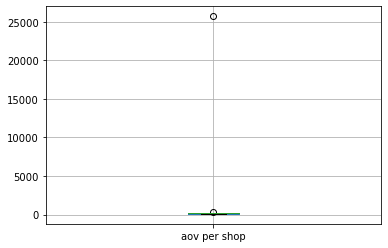

In [31]:
aov_df.boxplot(column='aov per shop')

In [32]:
outlier = aov_df['aov per shop'].max()
aov_df[aov_df['aov per shop'] == outlier]

,aov per shop
shop_id,
78,25725.0


## Part C: What is its value?

### Truncated dataset

**Answer**: In the above `boxplot`, we notice that the distribution extremely skewed to the bottom. Therefore, I would like to truncated the datset within median +/- 1.5. And now, we can see that the `truncated_df` is evenly distributed, with a median of `$153` and an acceptably small standard deviation `std` of `$22.61`.

count     96.000000
mean     151.437500
std       22.607783
min      101.000000
25%      133.000000
50%      153.000000
75%      166.500000
max      201.000000
Name: aov per shop, dtype: float64

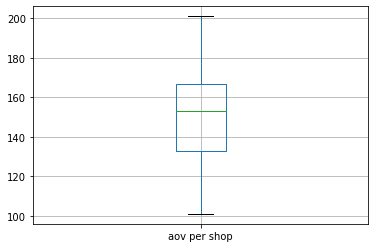

In [33]:
q1 = aov_df['aov per shop'].quantile(q=0.25)
q2 = aov_df['aov per shop'].quantile(q=0.5)
q3 = aov_df['aov per shop'].quantile(q=0.75)
IQR = q3 - q1

truncated_df = aov_df[(aov_df['aov per shop'] < q2 + IQR * 1.5) & (aov_df['aov per shop'] > q2 - IQR * 1.5)]
truncated_df.boxplot(column='aov per shop')
truncated_df['aov per shop'].describe()

### median value & modal value

**Answer**: We can also simply use the median and mode of the `aov of shop`, which are both `$153.0`.

In [34]:
aov_df['aov per shop'].median()

153.0

In [35]:
aov_df['aov per shop'].mode()

0    153.0
dtype: float64